# fvGP comprehensive test

## (0) Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp.gp import GP
%load_ext autoreload
%autoreload 2

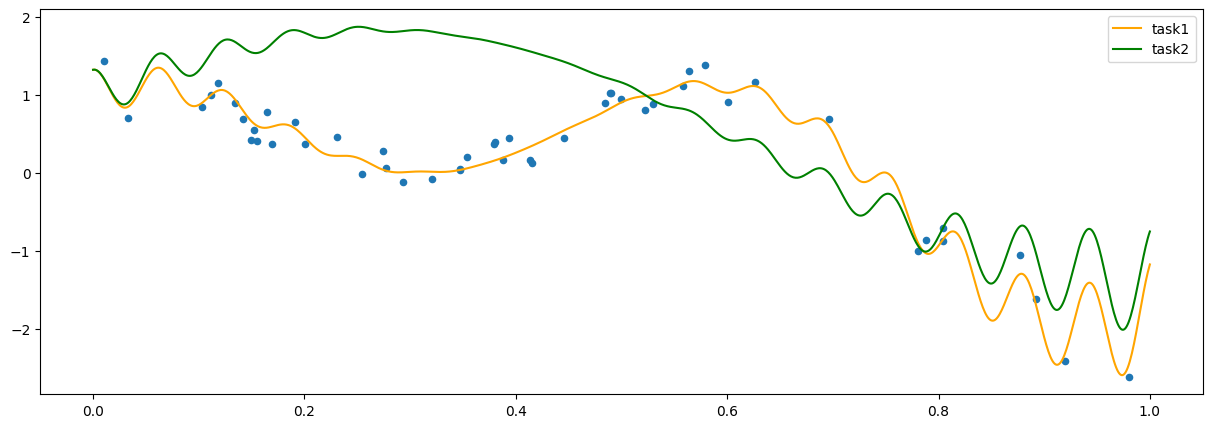

In [4]:
x = np.linspace(0,1,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

def f2(x):
    return np.sin(5. * x) + np.cos(2. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

x_data = np.random.rand(50)
y_data = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
plt.figure(figsize = (15,5))
plt.plot(x,f1(x), color = 'orange', label = 'task1')
plt.plot(x,f2(x), color = 'green',  label = 'task2')
plt.legend()
plt.scatter(x_data,y_data, s = 20)

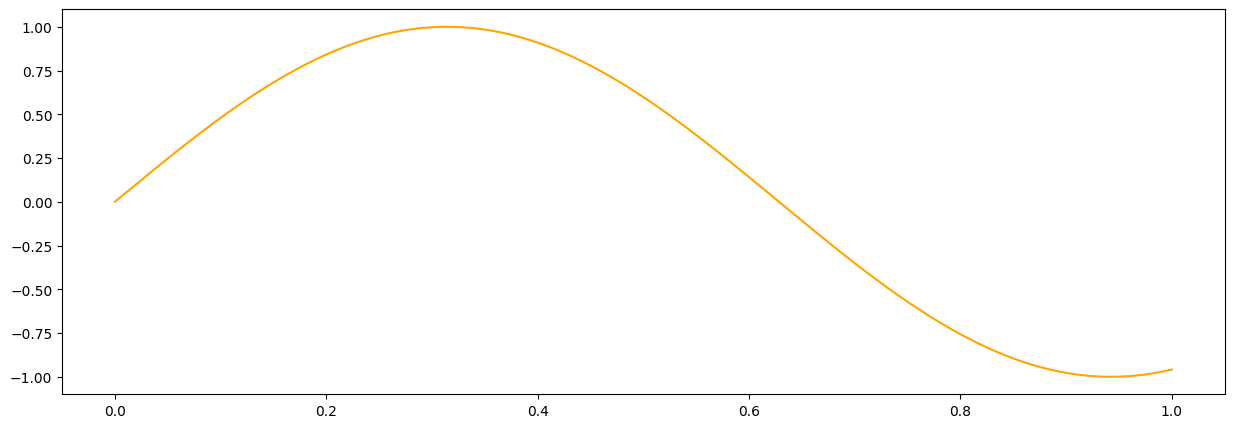

In [5]:
#stationary
def skernel(x1,x2,hps,obj):
    d = obj._get_distance_matrix(x1,x2)
    return hps[0] * obj.matern_kernel_diff1(d,hps[1])

def meanf(x, hps, obj):
    return np.sin(hps[2] * x)
plt.figure(figsize = (15,5))
plt.plot(x,meanf(x, np.array([1.,1.,5.0]), None), color = 'orange', label = 'task1')

/home/marcus/VirtualEnvironments/fvgp/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44923 instead
  warnings.warn(


error:  0.16294720587663306


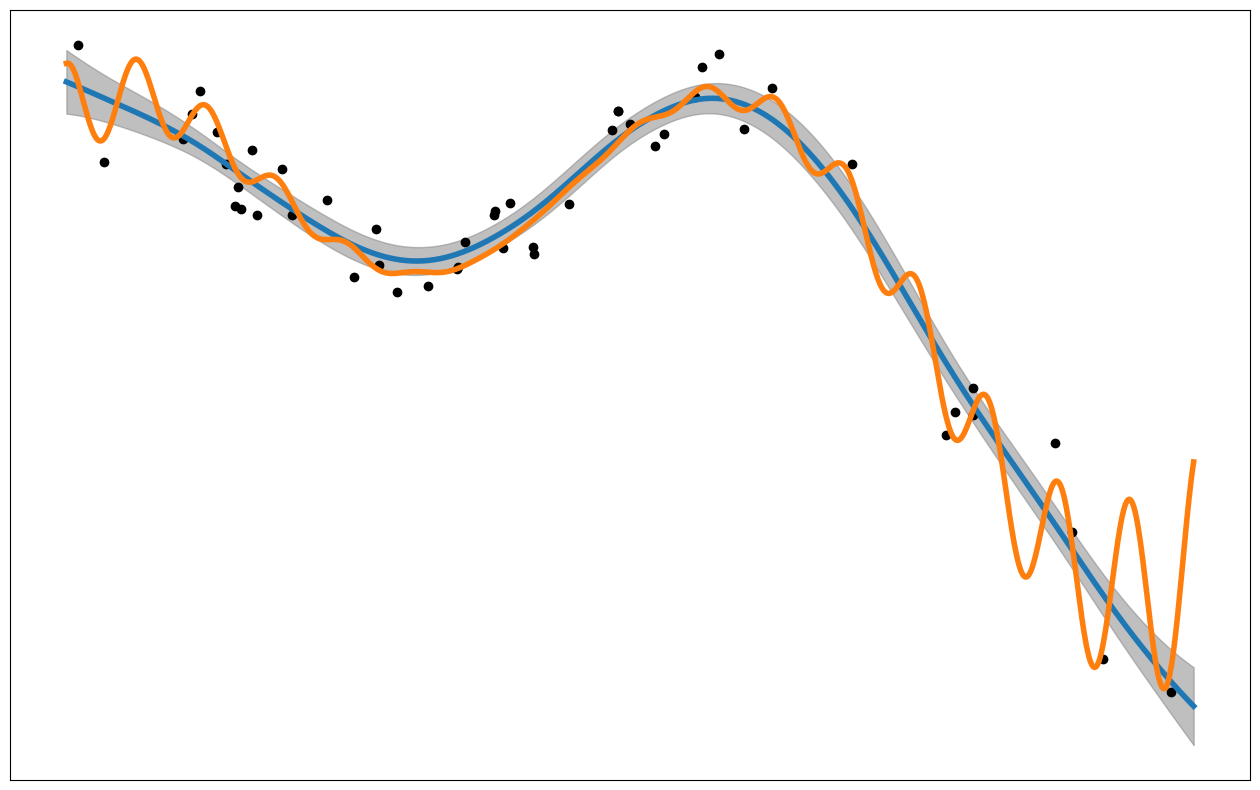

/home/marcus/VirtualEnvironments/fvgp/lib/python3.10/site-packages/scipy/optimize/_minimize.py:554: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/home/marcus/VirtualEnvironments/fvgp/lib/python3.10/site-packages/scipy/optimize/_minimize.py:554: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/home/marcus/VirtualEnvironments/fvgp/lib/python3.10/site-packages/scipy/optimize/_minimize.py:554: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


In [7]:
my_gp1 = GP(1, x_data,y_data,np.ones((2)),
            variances=None, 
            compute_device='cpu', 
            gp_kernel_function=skernel, 
            gp_kernel_function_grad=None, 
            gp_mean_function=None, 
            gp_mean_function_grad=None, 
            fixed_rank=None, 
            normalize_y=False, 
            use_inv=True, 
            ram_economy=True, 
            args=None,
            linear_algebra_engine="numpy"
            )

x_pred = np.linspace(0,1,1000)
opt_obj = my_gp1.train_async(np.array([[0.001,10.],[0.001,10.]]))
#my_gp1.train(np.array([[0.001,10.],[0.001,10.]]))
#let's make a prediction
mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["v(x)"]

plt.figure(figsize = (16,10))
plt.plot(x,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

In [12]:
my_gp1.update_hyperparameters(opt_obj)
for entry in opt_obj.optima.list:
    print(entry)
    print("")

#my_gp1.entropy(my_gp1.prior_covariance)

{'x': array([1.40004715, 0.0993551 ]), 'f(x)': 13.389360090310355, 'classifier': 'minimum', 'Hessian eigvals': array([  11.79251261, 4261.66700855]), 'df/dx': array([ 4.91903156e-06, -4.48298255e-06]), '|df/dx|': 6.655374066086877e-06, 'radius': 0.08479957009228291}

{'x': array([1.40004834, 0.09935508]), 'f(x)': 13.389360090321816, 'classifier': 'zero curvature', 'Hessian eigvals': array([0., 0.]), 'df/dx': array([ 1.72173237e-06, -2.20907459e-04]), '|df/dx|': 0.00022091416822066294, 'radius': 0.0}

{'x': array([1.40004721, 0.09935484]), 'f(x)': 13.389360090456364, 'classifier': 'degenerate', 'Hessian eigvals': array([0., 0.]), 'df/dx': array([ 3.17518032e-05, -1.13726744e-03]), '|df/dx|': 0.001137710595838852, 'radius': 0.0}

{'x': array([1.61579244, 0.1031939 ]), 'f(x)': 13.434982096221987, 'classifier': 'degenerate', 'Hessian eigvals': array([0., 0.]), 'df/dx': array([ 0.52326481, -8.26829505]), '|df/dx|': 8.284836097894468, 'radius': 0.0}



In [ ]:
#let's make a prediction
mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["v(x)"]

plt.figure(figsize = (16,10))
plt.plot(x,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

In [ ]:
my_gp1.stop_training(opt_obj)
my_gp1.kill_training(opt_obj)

# Performance Tests

In [ ]:
A = np.random.rand(5000,5000)
B = A.T @ A
b = np.random.rand(5000)
%timeit np.linalg.solve(B,b )

In [ ]:
from scipy.linalg import lu_factor, lu_solve
def solve_lu(Matrix,vec):
    lu, piv = lu_factor(Matrix)
    x = lu_solve((lu, piv), vec)
    return x



from scipy.linalg import cholesky
from scipy.linalg import cho_factor, cho_solve
def solve_chol(Matrix,vec):
    c, low = cho_factor(Matrix)
    x = cho_solve((c, low), vec)
    return x

In [ ]:
%timeit solve_lu(B,b)

In [ ]:
%timeit solve_chol(B,b)

In [ ]:
np.linalg.slogdet(B)

In [ ]:
from scipy.linalg import lu
u, piv = lu_factor(B)
upper_diag = abs(u.diagonal())
r = np.sum(np.log(upper_diag))
print("LU logdet: ",r)

u, low = cho_factor(B)
upper_diag = abs(u.diagonal())
r = 2.0 * np.sum(np.log(upper_diag))
print("chol logdet: ", r)
print("scipy logdet: ",np.linalg.slogdet(B))

In [ ]:
lu, piv = lu_factor(B)
%timeit x = lu_solve((lu, piv), b)

In [ ]:
%timeit torch.cholesky(torch.tensor(B))
%timeit np.linalg.cholesky(B)
%timeit cholesky(B)
print("--------[]")
%timeit torch.lu(torch.tensor(B))
%timeit lu(B)

In [ ]:
c, low = cho_factor(B)
%timeit x = cho_solve((c, low), b)
Binv = np.linalg.inv(B)
%timeit Binv @ b

In [1]:
from sksparse.cholmod import cholesky

ModuleNotFoundError: No module named 'sksparse'

In [2]:
!pip install sksparse


ERROR: Could not find a version that satisfies the requirement sksparse (from versions: none)
ERROR: No matching distribution found for sksparse
